In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv("data/global_sales_data/market_fact.csv")
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [4]:
# No of rows in the data
data.shape[0]

8399

In [3]:
# Statistical descriptions
data.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [8]:
# description for categorical
data.describe(include=object)

,Ord_id,Prod_id,Ship_id,Cust_id
count,8399,8399,8399,8399
unique,5506,17,7701,1832
top,Ord_2506,Prod_6,SHP_1378,Cust_1140
freq,6,1225,4,30


In [5]:
# missing values
data.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin    63
dtype: int64

#### Imputation
- Filling the missing values
    - Numerical columns
        - with a number
        - with mean or median or mode
        - using ML model make the missing value as output
    - categorical column
        - with a new category 
            - ex:'Unknown','?'
        - with mode (most frequent category)

Here  63 missing values are there in the numerical column Product_Base_Margin

In [7]:
data['Product_Base_Margin'] = \
                data['Product_Base_Margin'].fillna(data['Product_Base_Margin'].mean())
data['Product_Base_Margin'].isnull().sum()


0

#### Exploratory Data Analysis(EDA)

(array([8.047e+03, 2.580e+02, 7.800e+01, 1.300e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.2400000e+00, 8.9081210e+03, 1.7814002e+04, 2.6719883e+04,
        3.5625764e+04, 4.4531645e+04, 5.3437526e+04, 6.2343407e+04,
        7.1249288e+04, 8.0155169e+04, 8.9061050e+04]),
 <a list of 10 Patch objects>)

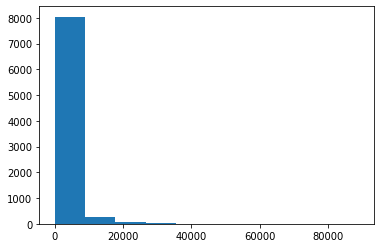

In [9]:
plt.hist(data['Sales'])

- In the first bin(2.24 to 8908) we have 8047 entries in the data
- Total no of entries 8399

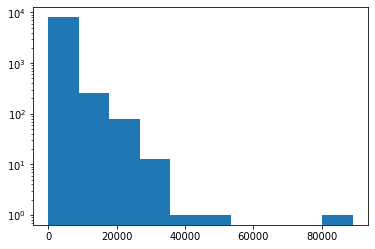

In [10]:
plt.hist(data['Sales'])
plt.yscale('log')

(array([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-14140.7  , -10004.561,  -5868.422,  -1732.283,   2403.856,
          6539.995,  10676.134,  14812.273,  18948.412,  23084.551,
         27220.69 ]),
 <a list of 10 Patch objects>)

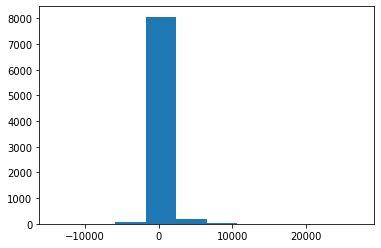

In [11]:
plt.hist(data['Profit'])

In [14]:
np.log([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([1.94591015, 2.19722458, 4.29045944, 8.99541298, 5.23644196,
       3.8286414 , 2.19722458,       -inf,       -inf, 0.        ])

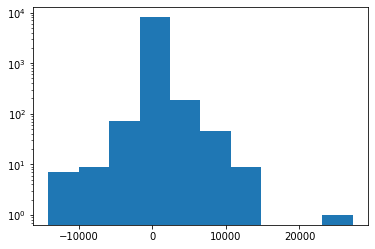

In [15]:
plt.hist(data['Profit'])
plt.yscale("log")

(array([868., 847., 789., 816., 854., 827., 848., 825., 876., 849.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

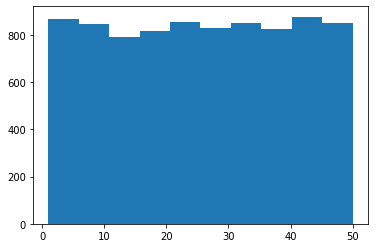

In [16]:
plt.hist(data['Order_Quantity'])

<BarContainer object of 17 artists>

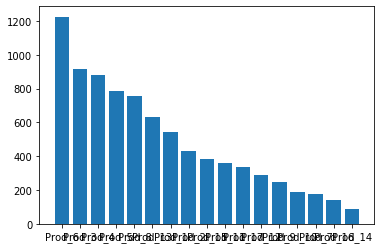

In [17]:
plt.bar(data['Prod_id'].value_counts().index,data['Prod_id'].value_counts())

<BarContainer object of 17 artists>

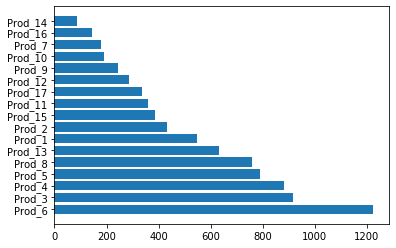

In [18]:
plt.barh(data['Prod_id'].value_counts().index,data['Prod_id'].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x2bebe356e08>,
 'caps': [<matplotlib.lines.Line2D at 0x2bebe35adc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bebe356408>],
 'medians': [<matplotlib.lines.Line2D at 0x2bebe35ed48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bebe35ec88>],
 'means': []}

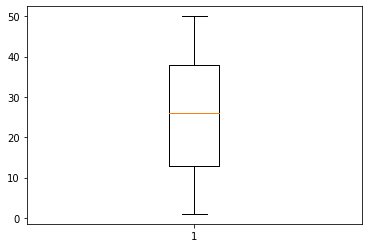

In [19]:
plt.boxplot(data['Order_Quantity'])

In [20]:
data['Order_Quantity'].describe()

count    8399.000000
mean       25.571735
std        14.481071
min         1.000000
25%        13.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Order_Quantity, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2bebe3bee48>,
 'caps': [<matplotlib.lines.Line2D at 0x2bebe3c3e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bebe3be548>],
 'medians': [<matplotlib.lines.Line2D at 0x2bebe3c8d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bebe3c8cc8>],
 'means': []}

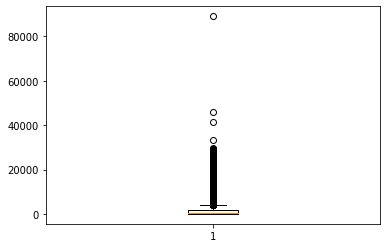

In [21]:
plt.boxplot(data['Sales'])

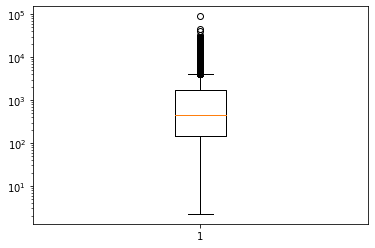

In [22]:
plt.boxplot(data['Sales'])
plt.yscale("log")

{'whiskers': [<matplotlib.lines.Line2D at 0x2bebe4d6308>,
 'caps': [<matplotlib.lines.Line2D at 0x2bebe495148>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bebe4c7fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2bebe4e0d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bebe4e0608>],
 'means': []}

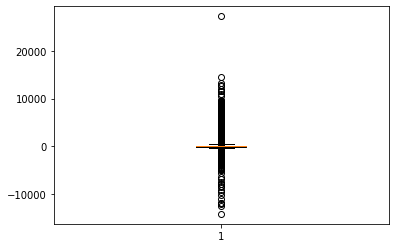

In [23]:
plt.boxplot(data['Profit'])

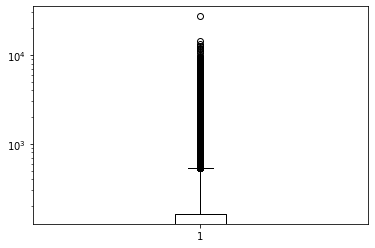

In [24]:
plt.boxplot(data['Profit'])
plt.yscale("log")

In [26]:
data[data['Profit']<0]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.810,0.01,23,-30.51,3.60,0.560000
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.020,0.03,23,-47.64,6.15,0.370000
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.220,0.07,8,-27.72,6.60,0.370000
13,Ord_2207,Prod_11,SHP_3093,Cust_839,3364.248,0.10,15,-693.23,61.76,0.780000
14,Ord_2207,Prod_10,SHP_3006,Cust_839,1410.930,0.08,10,-317.48,36.09,0.770000
...,...,...,...,...,...,...,...,...,...,...
8388,Ord_4424,Prod_1,SHP_6165,Cust_1519,994.040,0.03,10,-335.06,35.00,0.512513
8390,Ord_5435,Prod_16,SHP_7594,Cust_1798,316.990,0.04,47,-276.54,8.37,0.580000
8392,Ord_5384,Prod_9,SHP_7519,Cust_1798,181.500,0.08,43,-6.24,2.50,0.370000
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.160,0.10,20,-74.03,6.92,0.370000


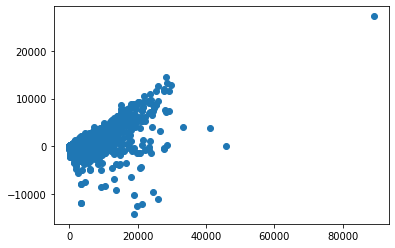

In [27]:
plt.scatter(data['Sales'],data['Profit'])

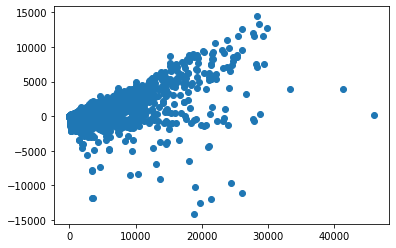

In [28]:
data1 = data[(data['Sales'] <50000) & (data['Profit']<20000)]
plt.scatter(data1['Sales'],data1['Profit'])

(-20000, 20000)

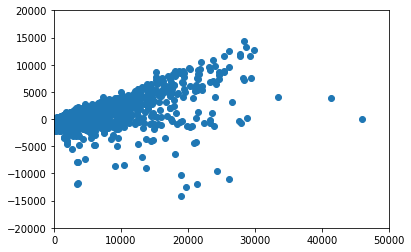

In [30]:
plt.scatter(data['Sales'],data['Profit'])
plt.xlim(0,50000)
plt.ylim(-20000,20000)

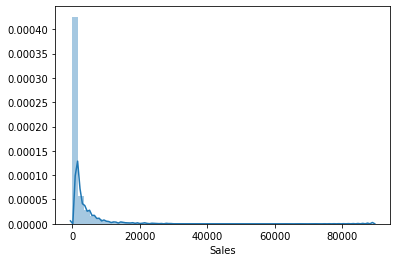

In [33]:
sns.distplot(data['Sales'])

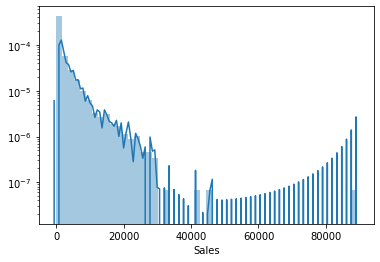

In [32]:
sns.distplot(data['Sales'])
plt.yscale('log')

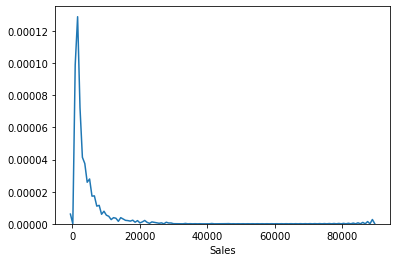

In [34]:
sns.distplot(data['Sales'],hist=False)

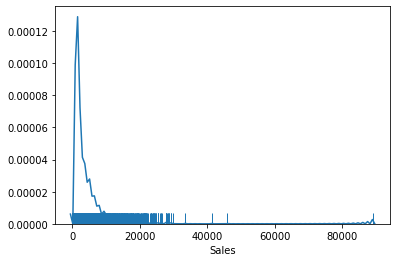

In [35]:
sns.distplot(data['Sales'],hist=False,rug=True)

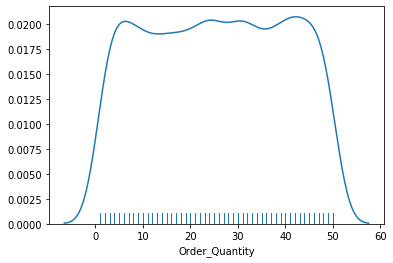

In [36]:
sns.distplot(data['Order_Quantity'],hist=False,rug=True)

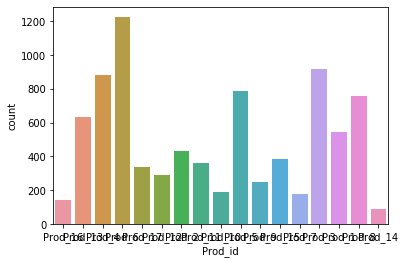

In [37]:
sns.countplot(data['Prod_id'])

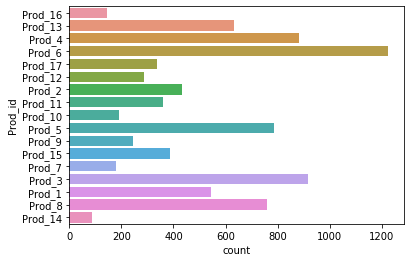

In [38]:
sns.countplot(y=data['Prod_id'])

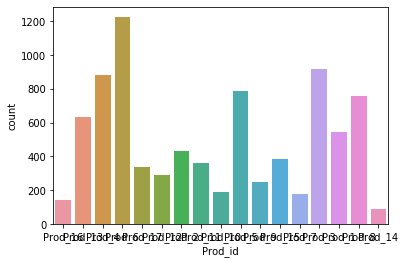

In [40]:
sns.countplot("Prod_id",data=data)

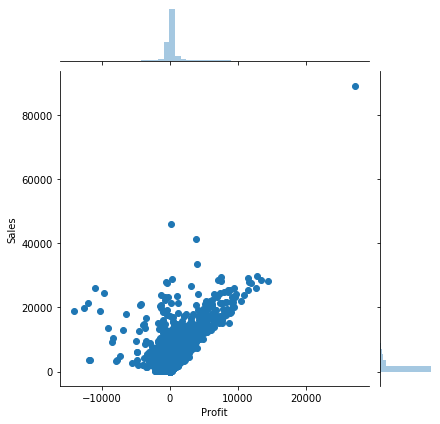

In [41]:
sns.jointplot("Profit","Sales",data=data)

In [42]:
data.columns[data.dtypes !=object]

Index(['Sales', 'Discount', 'Order_Quantity', 'Profit', 'Shipping_Cost',
       'Product_Base_Margin'],
      dtype='object')

In [ ]:
Salse,Discount
Salse, Orderer_Quantityu

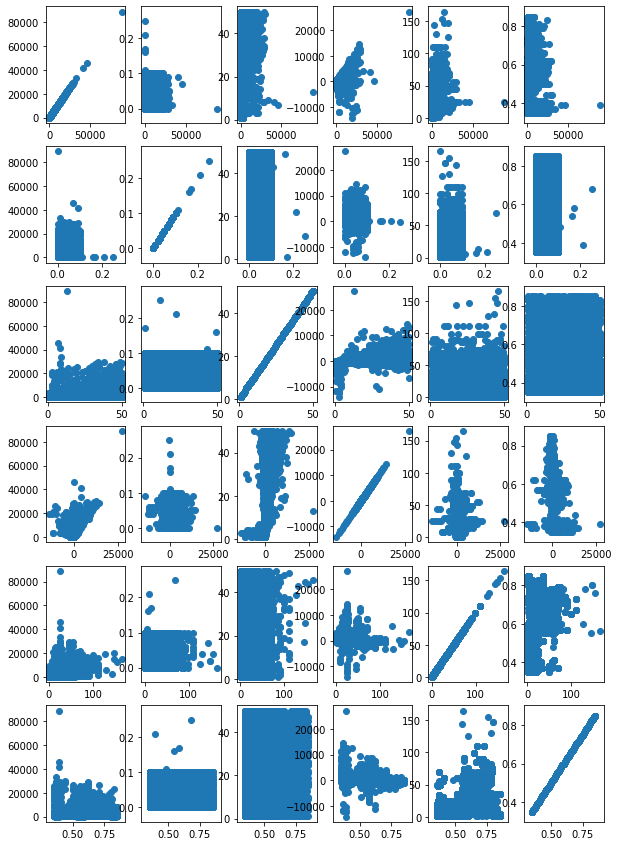

In [51]:
i = 0
plt.figure(figsize=(10,15))
for col in data.columns[data.dtypes !=object]:
    for col2 in data.columns[data.dtypes !=object]:
        i += 1
        plt.subplot(6,6,i)
        plt.scatter(data[col],data[col2])
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEC42BED08>,
      dtype=object)

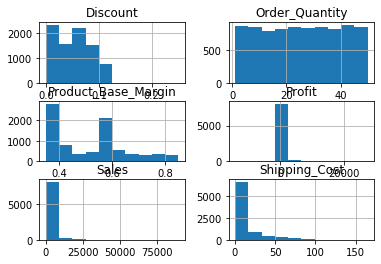

In [50]:
data.hist()

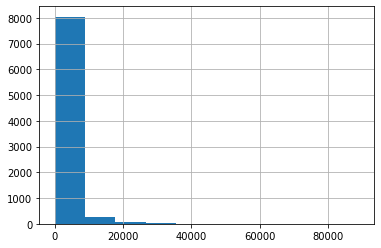

In [53]:
data['Sales'].hist()

In [54]:
data.corr()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Sales,1.000000,-0.019686,0.220582,0.581960,0.434578,0.155794
Discount,-0.019686,1.000000,-0.009649,-0.037128,-0.001956,0.004062
Order_Quantity,0.220582,-0.009649,1.000000,0.194655,-0.011457,0.007817
Profit,0.581960,-0.037128,0.194655,1.000000,-0.021362,-0.112124
Shipping_Cost,0.434578,-0.001956,-0.011457,-0.021362,1.000000,0.371056
Product_Base_Margin,0.155794,0.004062,0.007817,-0.112124,0.371056,1.000000


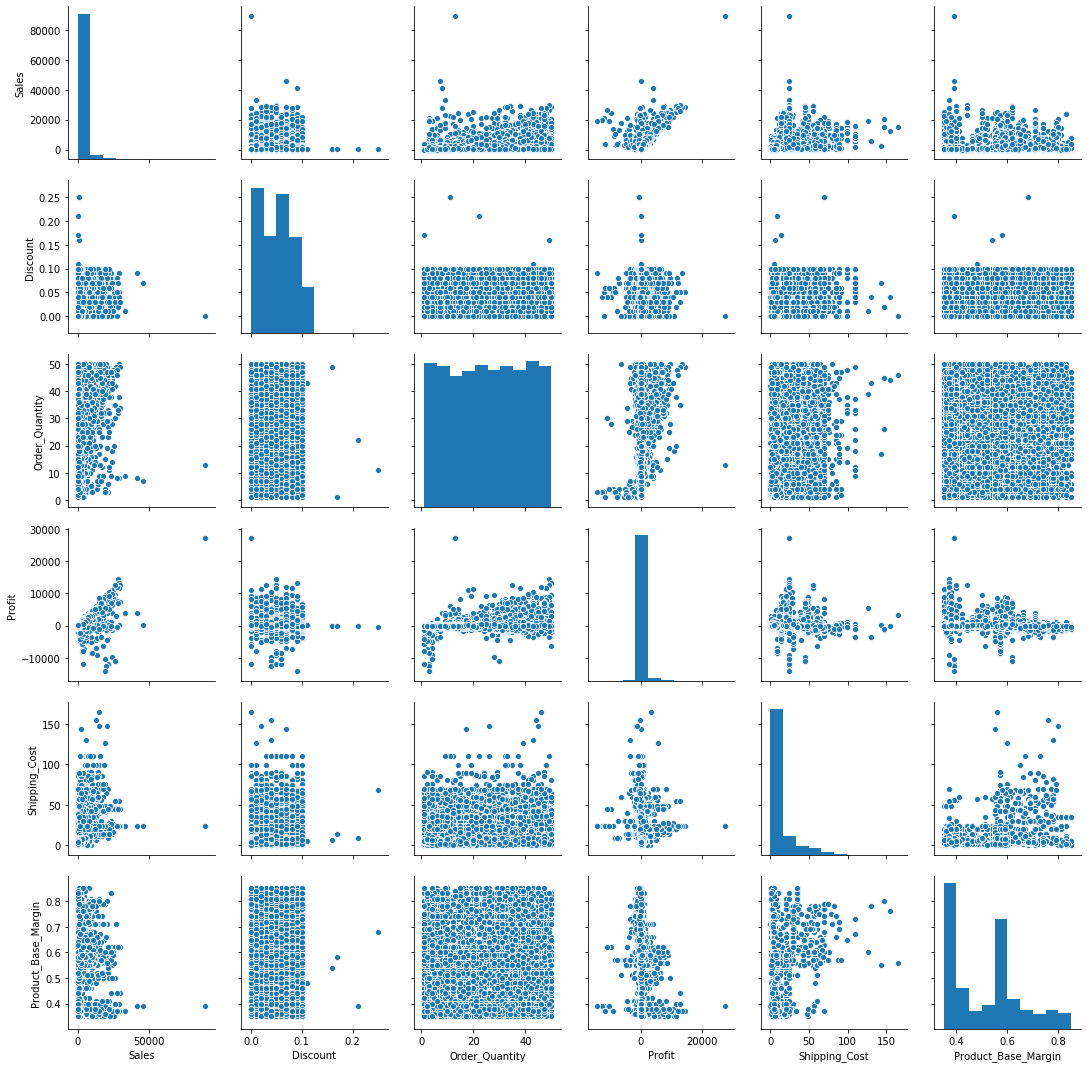

In [56]:
sns.pairplot(data)

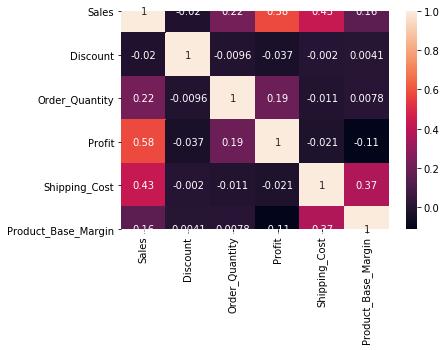

In [58]:
sns.heatmap(data.corr(),annot=True)

In [59]:
prod_df = pd.read_csv("data/global_sales_data/prod_dimen.csv")
prod_df

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5
5,OFFICE SUPPLIES,PAPER,Prod_6
6,OFFICE SUPPLIES,RUBBER BANDS,Prod_7
7,TECHNOLOGY,COMPUTER PERIPHERALS,Prod_8
8,OFFICE SUPPLIES,ENVELOPES,Prod_9
9,FURNITURE,BOOKCASES,Prod_10


In [60]:
final_df = pd.merge(data,prod_df)
final_df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5467,Prod_14,SHP_7639,Cust_1803,5964.19,0.10,33,988.20,24.49,0.46,TECHNOLOGY,COPIERS AND FAX
8395,Ord_825,Prod_14,SHP_1132,Cust_247,27663.92,0.05,8,-391.92,24.49,0.37,TECHNOLOGY,COPIERS AND FAX
8396,Ord_5368,Prod_14,SHP_7497,Cust_1795,17279.62,0.04,40,4176.25,24.49,0.52,TECHNOLOGY,COPIERS AND FAX
8397,Ord_1765,Prod_14,SHP_2446,Cust_595,14647.26,0.07,25,5485.15,24.49,0.37,TECHNOLOGY,COPIERS AND FAX


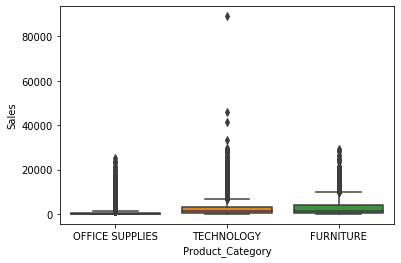

In [61]:
sns.boxplot(x='Product_Category',y="Sales",data=final_df)

In [63]:
cust_df = pd.read_csv("data/global_sales_data/cust_dimen.csv")
cust_df

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5
...,...,...,...,...,...
1827,NICOLE BRENNAN,ALBERTA,WEST,CONSUMER,Cust_1828
1828,JASON FORTUNE,ALBERTA,WEST,CORPORATE,Cust_1829
1829,HARRY GREENE,ALBERTA,WEST,CORPORATE,Cust_1830
1830,GRANT DONATELLI,ALBERTA,WEST,CONSUMER,Cust_1831


In [64]:
final_df = pd.merge(final_df,cust_df)
final_df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_973,Prod_8,SHP_1343,Cust_357,29.05,0.08,4,-20.90,4.32,0.64,TECHNOLOGY,COMPUTER PERIPHERALS,THEONE PIPPENGER,BRITISH COLUMBIA,WEST,CORPORATE
8395,Ord_1832,Prod_8,SHP_2526,Cust_636,57.03,0.00,7,-31.38,3.52,0.68,TECHNOLOGY,COMPUTER PERIPHERALS,TOM PRESCOTT,NEWFOUNDLAND,ATLANTIC,SMALL BUSINESS
8396,Ord_2010,Prod_8,SHP_2748,Cust_760,282.58,0.10,36,21.68,1.99,0.52,TECHNOLOGY,COMPUTER PERIPHERALS,TRACY PODDAR,NOVA SCOTIA,ATLANTIC,CORPORATE
8397,Ord_2988,Prod_14,SHP_4132,Cust_1105,9262.35,0.09,47,2787.59,24.49,0.46,TECHNOLOGY,COPIERS AND FAX,BECKY MARTIN,ONTARIO,ONTARIO,HOME OFFICE


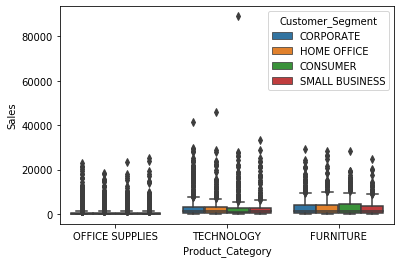

In [65]:
sns.boxplot(x='Product_Category',y="Sales",hue="Customer_Segment",data=final_df)

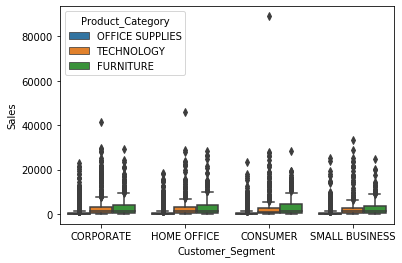

In [66]:
sns.boxplot(x='Customer_Segment',y="Sales",hue="Product_Category",data=final_df)

What is Impuattion?<br>
What is Exploratory Data Analysis?<br>
Possitively skewed,Negatively skewed<br>
Uniform distribution<br>
Distributions
- Normal distribution
- Gaussian Distribution
- Probability Density function
- Kernel density function

Seaborn
- distplot
    - rug
    - hist
- barplot
- boxplot
- countplot
- pairplot
- jointplot
- heatmap
- How to visualise a combo of categorical and numerical columns by using seaborn